In [110]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import cumtrapz
from scipy.interpolate import interp1d, UnivariateSpline
from scipy.misc import derivative
import warnings; warnings.filterwarnings('ignore')
plt.rc('axes', lw =2); plt.rc('font',family = 'serif'); plt.rc('text', usetex = True)

In [53]:
pk_lin= pd.read_csv('./linear_pk.txt', delim_whitespace = True, header = None, skiprows = 7)

In [54]:
pk0 = pd.read_csv('./Pk_m_z=0.txt', delim_whitespace = True)
pk0p5 = pd.read_csv('./Pk_m_z=0.5.txt', delim_whitespace = True)
pk1 = pd.read_csv('./Pk_m_z=1.txt', delim_whitespace = True)
pk2 = pd.read_csv('./Pk_m_z=2.txt', delim_whitespace = True)

for pkdf in [pk_lin, pk0,pk0p5,pk1,pk2]: pkdf.columns = ['k','Pk']
    
interpolator = scipy.interpolate.interp1d(pk_lin.k,pk_lin.Pk)

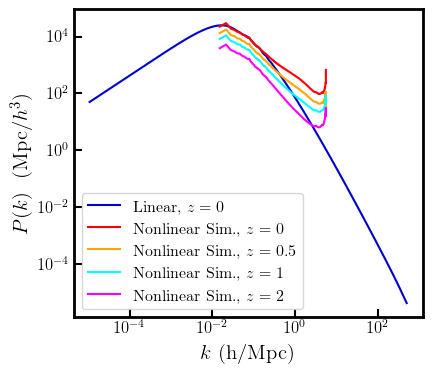

In [95]:
plt.figure(figsize = (4.5,4))
plt.plot(df.k,df.Pk, color = 'mediumblue', label = 'Linear, $z = 0$')
plt.plot(pk0.k,pk0.Pk, color = 'red', label = 'Nonlinear Sim., $z = 0$')
plt.plot(pk0p5.k,pk0p5.Pk, color = 'orange', label = 'Nonlinear Sim., $z = 0.5$')
plt.plot(pk1.k,pk1.Pk, color = 'cyan', label = 'Nonlinear Sim., $z = 1$')
plt.plot(pk2.k,pk2.Pk, color = 'magenta', label = 'Nonlinear Sim., $z = 2$')


# aesthetics
plt.yscale('log'); plt.xscale('log')
plt.xlabel('$k$ (h/Mpc)', fontsize = 15); plt.ylabel(r'$P(k)$ \ (Mpc/$h^{3}$)', fontsize = 15)
plt.legend(loc = 'lower left', fontsize = 11.5)

ax = plt.gca()
ax.tick_params(which =  'major', direction = 'in', length = 6, width = 1.5, labelsize = 12)
ax.tick_params(which =  'minor', direction = 'in', length = 3, width = 1.25, labelsize = 12)
ax.minorticks_on()
plt.savefig('./PowerSpectrumRedshiftDependence.pdf',bbox_inches = 'tight')

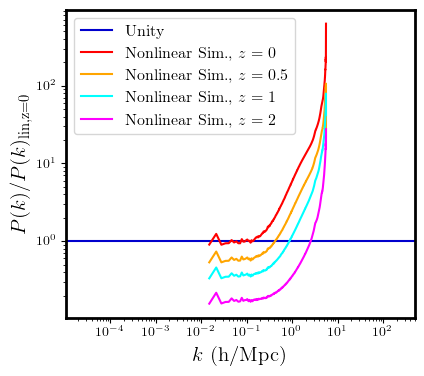

In [132]:
plt.figure(figsize = (4.5,4))
plt.plot(df.k,df.Pk/interpolator(df.k), color = 'mediumblue', label = 'Unity')
plt.plot(pk0.k,pk0.Pk/interpolator(pk0.k), color = 'red', label = 'Nonlinear Sim., $z = 0$')
plt.plot(pk0p5.k,pk0p5.Pk/interpolator(pk0p5.k), color = 'orange', label = 'Nonlinear Sim., $z = 0.5$')
plt.plot(pk1.k,pk1.Pk/interpolator(pk1.k), color = 'cyan', label = 'Nonlinear Sim., $z = 1$')
plt.plot(pk2.k,pk2.Pk/interpolator(pk2.k), color = 'magenta', label = 'Nonlinear Sim., $z = 2$')


plt.xscale('log'); plt.yscale('log'); plt.xlim(pk_lin.k.min(),pk_lin.k.max())
plt.xlabel('$k$ (h/Mpc)', fontsize = 15); plt.ylabel(r'$P(k)/P(k)_{\rm lin,z=0}$', fontsize = 15)
plt.legend(loc = 'upper left', fontsize = 11.5)

ratio_0 = interp1d(pk0.k,pk0.Pk/interpolator(pk0.k))
ratio_0p5 = interp1d(pk0p5.k,pk0p5.Pk/interpolator(pk0p5.k))
ratio_1 = interp1d(pk1.k,pk1.Pk/interpolator(pk1.k))
ratio_2 = interp1d(pk2.k,pk2.Pk/interpolator(pk2.k))
fine_spacing = np.linspace(0.1,1,100)


plt.savefig('PkRatioNonLin.pdf',bbox_inches ='tight')

# plt.axvline(0.15, color = 'red')

In [121]:
growth_function_D = np.asarray([np.sqrt(pk0.Pk[np.argmin(pk0.k -0.017)] /interpolator(0.017)),
                     np.sqrt(pk0p5.Pk[np.argmin(pk0p5.k -0.017)]/interpolator(0.017)),
                     np.sqrt(pk1.Pk[np.argmin(pk1.k -0.017)]/interpolator(0.017)),
                     np.sqrt(pk2.Pk[np.argmin(pk2.k -0.017)]/interpolator(0.017))
                    ])
print(growth_function_D)
normalization_constant = 1/growth_function_D[0]
D_normalized = growth_function_D * normalization_constant
print(D_normalized)
redshifts = [0,0.5,1,2]

spl = UnivariateSpline(redshifts, D_normalized)
test_z = np.linspace(0,2,200)

[0.94887051 0.72942167 0.57551925 0.39562126]
[1.         0.76872625 0.60653086 0.41693915]


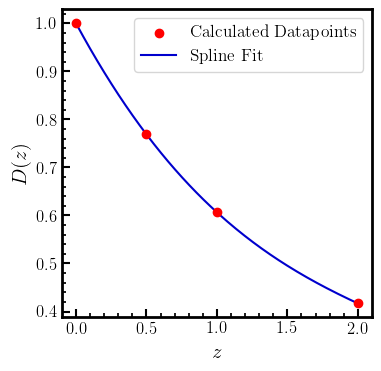

In [131]:
plt.figure(figsize = (4,4))
plt.scatter(redshifts, D_normalized, color = 'red', label = 'Calculated Datapoints')
plt.plot(test_z, spl(test_z), color = 'mediumblue', label = 'Spline Fit', zorder = -5)
plt.xlabel('$z$', fontsize = 15); plt.ylabel('$D(z)$', fontsize = 15) 
ax = plt.gca()
ax.tick_params(which =  'major', direction = 'in', length = 6, width = 1.5, labelsize = 12)
ax.tick_params(which =  'minor', direction = 'in', length = 3, width = 1.25, labelsize = 12)
ax.minorticks_on()
plt.legend(loc = 'upper right', fontsize = 12.5)
plt.savefig('GrowthFunction(z).pdf',bbox_inches = 'tight')